<a href="https://colab.research.google.com/github/SophieShin/NLP-22-Fall/blob/main/%5BSSH%5Dlab01_colab_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 – Colab basics 
### NOTE: Before starting this tutorial
- This file is not editable. **Save a copy to your Drive** first before working on it:
  - ``File-->Save a copy in Drive``
- The copy of the notebook should open and you can work on it. 
- Click ``Connect-->Connect to a hosted runtime``
- **runtime** refers to the hosted virtual machine on Google Cloud
- **local machine** refers to your own machine, e.g. PC or laptop

## 1. Command lines in Colab

- Command lines are preceeded by a ``!``
- For more command lines that can help you navigate within your working space, see [here](http://www.mathcs.emory.edu/~valerie/courses/fall10/155/resources/unix_cheatsheet.html)
- Run each of these code cells and understand what it is doing.

In [1]:
# Show current directory
!pwd

# See the contents of the current directory
!ls -al

# Verify this by clicking on the "Folder" image on the left to see the current directory pictorially
# Can you see what is inside the folder "sample_data" by clicking on it?
# Command line alternative: how would you modify the ls command to see the 
# list of files inside "sample_data"?
!ls -al sample_data

/content
total 16
drwxr-xr-x 1 root root 4096 Aug 15 13:44 .
drwxr-xr-x 1 root root 4096 Sep  1 09:42 ..
drwxr-xr-x 4 root root 4096 Aug 15 13:44 .config
drwxr-xr-x 1 root root 4096 Aug 15 13:44 sample_data
total 55512
drwxr-xr-x 1 root root     4096 Aug 15 13:44 .
drwxr-xr-x 1 root root     4096 Aug 15 13:44 ..
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Aug 15 13:44 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Aug 15 13:44 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Aug 15 13:44 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Aug 15 13:44 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


## Changing directory
- You cannot use ``!cd`` to navigate the filesystem because shell commands in the notebook are executed in a temporary subshell.
- In general, use ``!`` if the command is one that's okay to run in a separate shell. Use ``%`` if the command needs to be run on the specific notebook.

In [2]:
# Try to go one directory up
!cd ..

!pwd # Does it go to the root directory or remains the same as before?

/content


Now try use the ``%cd`` magic command:


In [3]:
# Go one directory up
%cd ..

!pwd

/
/


Go back to the previous directory you were in

In [4]:
%cd -

/content


## Removing A Directory

In [5]:
# Run this code cell once
import shutil
!mkdir my_dir # Create a directory
!ls # Check that new directory exists


my_dir	sample_data


In [6]:
shutil.rmtree('/content/my_dir')
!ls # Check that new directory is deleted

sample_data


## 2. Processor related commands
Check if GPU is available by running the cell below


In [1]:
import torch 

if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("GPU")
else:
  device = torch.device("cpu")
  print("CPU")

GPU


### Get further info on processor

In [2]:
# Gets CPU info on the virtual machine
!cat /proc/cpuinfo | grep 'processor\|model name\|cpu cores'

processor	: 0
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
cpu cores	: 1
processor	: 1
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
cpu cores	: 1


In [3]:
# Get GPU info on the virtual machine
!nvidia-smi

Thu Sep  1 09:51:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    12W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## REPEAT the last three cells
- After running the last 3 code cells, click ``Runtime-->Change runtime type-->GPU``
and rerun them now. Do you see different outcomes now?


## 3. Python related command lines

In [4]:
!python --version

Python 3.7.13


To import a library that's not in Colaboratory by default, you can use ``!pip install`` or ``!apt-get install``

In [5]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Show information about one or more installed packages.

In [6]:
!pip show torch

Name: torch
Version: 1.12.1+cu113
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.7/dist-packages
Requires: typing-extensions
Required-by: torchvision, torchtext, torchaudio, fastai


Python printing

In [7]:
print('This is a sample sentence')

This is a sample sentence


In [8]:
x = 5

print(f"The value of x is {x}")

The value of x is 5


## 4. Working with Files
- Mount Drive onto the runtime machine so that you can load files from Drive to your runtime
- NOTE: You will most likely be asked for an authorisation code, click on the link and copy the code over
- ~~You could also mount Drive by clicking on on the Mount Drive button on the left panel~~


In [9]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### If you click on the "Folder" image on the left, you should see an additional folder "gdrive"
- List content of mounted drive

In [10]:
!ls '/content/gdrive'

MyDrive


### What about loading files from your local machine?
- ``files`` module under ``google.colab`` should be imported in advance.
- Then use ``files.upload()`` function to upload CSV or TXT file.
- Run the code below, you should be able to choose one or more files to be uploaded to the runtime
- Press 'Choose files' and select the file(s) that you want to upload
- Verify by seeing the runtime's folder content on the left

In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

Saving WhatsApp Image 2022-08-17 at 4.28.13 AM (1).jpeg to WhatsApp Image 2022-08-17 at 4.28.13 AM (1).jpeg
User uploaded file "WhatsApp Image 2022-08-17 at 4.28.13 AM (1).jpeg" with length 316917 bytes


## Downloading files from runtime to the local machine
- Create a new file (or overwrite an existing file) on runtime and download it to local
- <code>files.download()</code> will invoke a browser download of the file to your local computer.


In [12]:
from google.colab import files

# Select the file from the runtime to local
with open('example.txt', 'w') as f:
  f.write('This is a simple file with one line of text.')
  f.close()

files.download('example.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download an existing file from runtime to local

In [13]:
# Existing file on runtime to local
open('sample_data/README.md', 'r')

files.download('sample_data/README.md')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5. Working with images
### Upload file from mounted folder and view it
- Import PIL (Python Imaging Library) for image manipulation
- Import matplotlib for visualisation
- Save an image file (png or jpg in a folder in Drive)
- Make sure Drive is mounted to the runtime after the image is saved
- Open the file using Image.open()
- Display the image

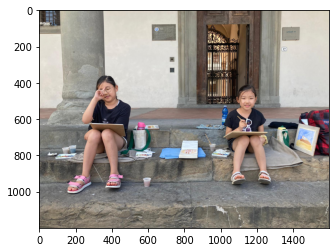

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

# 1. Locate the file in Drive and open it
img = Image.open("/content/gdrive/MyDrive/Colab Notebooks/NLP(22 Fall)/image1.jpeg") # TODO: replace this with a path to an image in your own Drive

plt.imshow(img)



### DIsplay rgb image using cv2 library

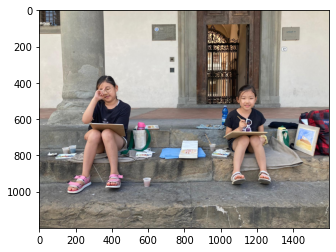

In [19]:
import cv2
img = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/NLP(22 Fall)/image1.jpeg") # TODO: replace this with a path to an "RGB" image in your own Drive
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB )
plt.imshow(img)